## Image Colorization with CNN


### UCU Machine Learning Project

In [47]:
# importing packages

import matplotlib.pyplot as plt
import cv2

import numpy as np # linear algebra
import pandas as pd 

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Reshape, InputLayer, UpSampling2D

import tensorflow as tf

### Reading images

In [48]:
images_gray = np.load('image-colorization/l/gray_scale.npy')
images_lab = np.load('image-colorization/ab/ab/ab1.npy')

In [49]:
def pipe_line_img(gray_scale_imgs, batch_size, preprocess_f = preprocess_input):
    imgs = np.zeros((batch_size, 224, 224, 3))
    for i in range(0, 3):
        imgs[:batch_size, :, :,i] = gray_scale_imgs[:batch_size]
    return preprocess_f(imgs)

imgs_for_input = pipe_line_img(images_gray, 300)

In [50]:
def get_rbg_from_lab(gray_imgs, ab_imgs, n = 10):
    
    #create an empty array to store images
    imgs = np.zeros((n, 224, 224, 3))
    
    imgs[:, :, :, 0] = gray_imgs[0:n:]
    imgs[:, :, :, 1:] = ab_imgs[0:n:]
    
    imgs = imgs.astype("uint8")
    
    #create a new empty array
    imgs_ = []
    
    for i in range(0, n):
        imgs_.append(cv2.cvtColor(imgs[i], cv2.COLOR_LAB2RGB))

    #convert the image matrix into a numpy array
    imgs_ = np.array(imgs_)
    
    return imgs_
    
imgs_for_output = preprocess_input(get_rbg_from_lab(gray_imgs = images_gray, ab_imgs = images_lab, n = 300))

### Training

In [51]:
model = Sequential()

model.add(Conv2D(strides = 1, kernel_size = 3, filters = 12, use_bias = True,
                        bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))

model.add(Conv2D(strides = 1, kernel_size = 3, filters = 12, use_bias = True,
                        bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))


model.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 12, use_bias = True,
                                 bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))


model.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 3, use_bias = True, 
                                 bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))


#Compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(epsilon = 1e-8), loss = tf.compat.v1.losses.mean_pairwise_squared_error)

In [52]:
imgs_for_s = np.zeros((300, 224, 224, 1))
imgs_for_s[:, :, :, 0] = images_gray[:300] 

In [53]:
model.fit(imgs_for_input, imgs_for_output, epochs = 25, batch_size = 20)

Train on 300 samples
Epoch 1/25
300/300 [==============================] - 37s 123ms/sample - loss: 8.0698
Epoch 2/25
300/300 [==============================] - 25s 83ms/sample - loss: 4.8162
Epoch 3/25
300/300 [==============================] - 19s 65ms/sample - loss: 3.7440
Epoch 4/25
300/300 [==============================] - 18s 61ms/sample - loss: 3.0159
Epoch 5/25
300/300 [==============================] - 20s 67ms/sample - loss: 2.6100
Epoch 6/25
300/300 [==============================] - 20s 67ms/sample - loss: 2.4540
Epoch 7/25
300/300 [==============================] - 19s 63ms/sample - loss: 2.3914
Epoch 8/25
300/300 [==============================] - 20s 65ms/sample - loss: 2.3295
Epoch 9/25
300/300 [==============================] - 25s 82ms/sample - loss: 2.2608
Epoch 10/25
300/300 [==============================] - 29s 95ms/sample - loss: 2.1607
Epoch 11/25
300/300 [==============================] - 22s 75ms/sample - loss: 2.0703
Epoch 12/25
300/300 [====================

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


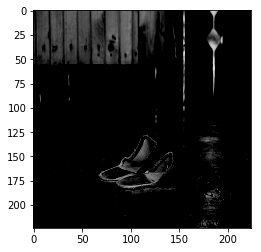

In [57]:
plt.imshow(imgs_for_input[60])

In [58]:
prediction = model.predict(imgs_for_input)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


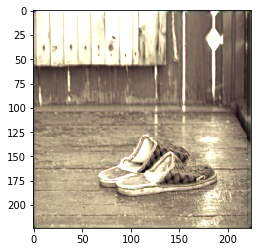

In [59]:
#display the predicted image
plt.imshow(prediction[60])